In [47]:
from ROOT import TCanvas, TH1D, TH1F, TF1 #must install root
import uproot #reads root files in python
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
from fit2MeV_Gaussian import fit1MeV_Gaussian
from scipy.stats import norm
import matplotlib.mlab as mlab

#All needed fucntions used in python

In [23]:
Xic0MassHist = TCanvas('Histogram of Xi_c0 Mass', "", 720, 480) #Defined a canvas

In [24]:
Xic0M = TH1D("Xi DDL, Omega- K+", "DDL Cuts", 100, 2300, 3100) #Defined a plot to put onto that canvas

In [25]:
tuples = uproot.open("combined.root") 

In [26]:
tree = uproot.open("combined.root")["myOmegamKpTuple"]["DecayTree"] #Selects the file myOmegamKpTuple_0.root, then opens the folder myOmegamKpTuple
#and then opens the folder Decay Tree

In [27]:
eStart = 0
eStop = 5000000 #These are used to select all of the events, len() could have worked too but picking a big number is easier

In [28]:
Xic0_MM = tree["Xi_c0_MM"].array(entrystart = eStart, entrystop = eStop)
Xi_c0_PT = tree["Xi_c0_PT"].array(entrystart = eStart, entrystop = eStop)

Omega_MM = tree["Omega_MM"].array(entrystart = eStart, entrystop = eStop)

OmegaK_TRACK_Type = tree["OmegaK_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)
OmegaK_ProbNNk = tree["OmegaK_ProbNNk"].array(entrystart = eStart, entrystop = eStop)

Lambda_MM = tree["Lambda_MM"].array(entrystart = eStart, entrystop = eStop)

LambdaPr_ProbNNp = tree["LambdaPr_ProbNNp"].array(entrystart = eStart, entrystop = eStop)
LambdaPr_TRACK_Type = tree["LambdaPr_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)

LambdaPi_ProbNNpi = tree["LambdaPi_ProbNNpi"].array(entrystart = eStart, entrystop = eStop)
LambdaPi_TRACK_Type = tree["LambdaPi_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)

PromptPi_ProbNNk = tree["PromptPi_ProbNNk"].array(entrystart = eStart, entrystop = eStop)
PromptPi_IPCHI2_OWNPV = tree["PromptPi_IPCHI2_OWNPV"].array(entrystart = eStart, entrystop = eStop)

#Selecting the tuples and defining them as their own variable name

In [29]:
Omega_MM_Corrected = Omega_MM - Lambda_MM + 1115.683 #Better Omega_MM measurement

In [30]:
Omega_MM_Corrected_v2 = (Omega_MM_Corrected > 1665) & (Omega_MM_Corrected < 1680)
OmegaK_Corrected = (OmegaK_ProbNNk > 0.55)

Lambda_MM_Corrected = (Lambda_MM > 1112) & (Lambda_MM < 1120)

LambdaPr_ProbNNp_Corrected = (LambdaPr_ProbNNp > 0.1)

LambdaPi_ProbNNpi_Corrected = (LambdaPi_ProbNNpi > 0.05)

PromptPi_ProbNNk_Corrected = (PromptPi_ProbNNk  > 0.55)
PromptPi_IPCHI2_OWNPV_Corrected = (PromptPi_IPCHI2_OWNPV > 6)

#Cuts

In [31]:
FirstCuts = Omega_MM_Corrected_v2 & OmegaK_Corrected & Lambda_MM_Corrected & LambdaPr_ProbNNp_Corrected & LambdaPi_ProbNNpi_Corrected & PromptPi_ProbNNk_Corrected & PromptPi_IPCHI2_OWNPV_Corrected
#Defining what cuts should be applied to Xi_c0 as FirstCuts

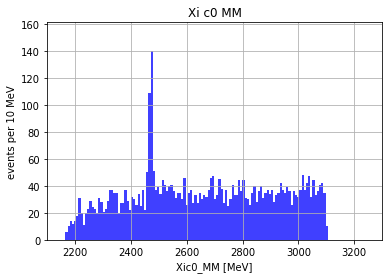

In [32]:
Corrected_Xic0_Mass = Xic0_MM[FirstCuts] #Applying cuts to Xic0_MM 
nEvents = len(Corrected_Xic0_Mass)
nEvents2 = range(0, nEvents)
plt.figure()
n, bins, patches = plt.hist(Corrected_Xic0_Mass, 120, density=False, facecolor="b", alpha=0.75)
plt.xlabel('Xic0_MM [MeV]')
plt.ylabel('events per 10 MeV')
plt.title('Xi c0 MM')
plt.axis([2100,3300,0,1.15*max(n)])
plt.grid(True)
plt.show()
plt.close()
#Displaying the graph with bin numbers, labels, colors, etc.

In [33]:
myXifit = TF1("myXifit", fit1MeV_Gaussian, 2380, 2580, 5)
myXifit.SetParameter(0, 120)
myXifit.SetParameter(1, 2471)
myXifit.SetParameter(2, 40)
myXifit.SetParameter(3, 0)
myXifit.SetParameter(4, 0)
#Setting the parameters to the fit function

In [46]:
Corrected_Xic0_Mass.Fit("myXifit") #This is where the code breaks down

AttributeError: 'numpy.ndarray' object has no attribute 'Fit'